In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [23]:
X = data.iloc[:, 2:4].values
X.shape

(400, 2)

In [24]:
y = data.iloc[:, -1].values
y.shape

(400,)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape

(320, 2)

In [26]:
X_test.shape

(80, 2)

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 1st method to calculate k

In [33]:
# sqrt of number of observations
print(X_train.shape[0])
np.sqrt(X_train.shape[0])

320


17.88854381999832

In [31]:
k = 17

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [34]:
y_pred = knn.predict(X_test)
y_pred.shape

(80,)

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.925

In [36]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[48,  4],
       [ 2, 26]], dtype=int64)

In [37]:
# Effect of k on Training Error rate and Validation Error Rate

error_train = []
error_test = []

for i in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    x = confusion_matrix(y_train, knn.predict(X_train))
    y = confusion_matrix(y_test, knn.predict(X_test))
    error_train.append((x[0][1] + x[1][0]) / x.sum())
    error_test.append((y[0][1] + y[1][0]) / y.sum())

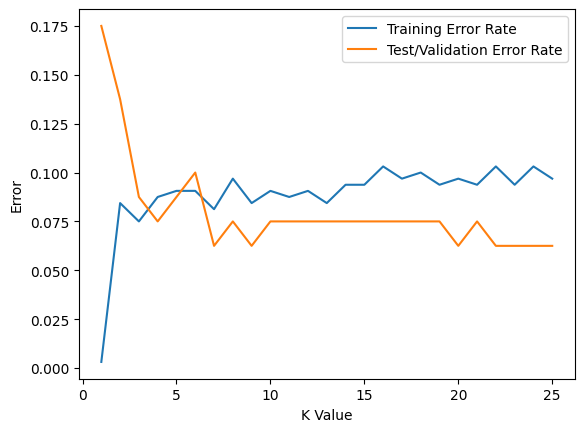

In [38]:
plt.plot(range(1, 26), error_train, label='Training Error Rate')
plt.plot(range(1, 26), error_test, label='Test/Validation Error Rate')
plt.xlabel('K Value')
plt.ylabel('Error')
plt.legend()

In [42]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [44]:
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9375

In [45]:
def predict_output():
    age = int(input('Enter the age: '))
    salary = int(input('Enter the salary: '))

    X_new = np.array([[age], [salary]]).reshape(1, 2)
    X_new = scaler.transform(X_new)

    if knn.predict(X_new)[0] == 0:
        return 'Will not purchase'
    else:
        return 'Will purchase'

In [46]:
predict_output()

'Will not purchase'

In [2]:
## 1. Hyperparameters

## 2. Method to choose k

# Method 1 k = 17
# Method 2 k = 7

## Creating a sample meshgrid

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3])
y = np.array([4, 5, 6, 7])

XX, YY = np.meshgrid(x, y)
print(XX)

[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]


In [5]:
print(YY)

[[4 4 4]
 [5 5 5]
 [6 6 6]
 [7 7 7]]


In [8]:
print(XX.shape)
print(YY.shape)

(4, 3)
(4, 3)


### Plotting a function using meshgrid

In [10]:
x = np.linspace(-40, 40, 100)
y = np.linspace(-50, 50, 90)

x

array([-40.        , -39.19191919, -38.38383838, -37.57575758,
       -36.76767677, -35.95959596, -35.15151515, -34.34343434,
       -33.53535354, -32.72727273, -31.91919192, -31.11111111,
       -30.3030303 , -29.49494949, -28.68686869, -27.87878788,
       -27.07070707, -26.26262626, -25.45454545, -24.64646465,
       -23.83838384, -23.03030303, -22.22222222, -21.41414141,
       -20.60606061, -19.7979798 , -18.98989899, -18.18181818,
       -17.37373737, -16.56565657, -15.75757576, -14.94949495,
       -14.14141414, -13.33333333, -12.52525253, -11.71717172,
       -10.90909091, -10.1010101 ,  -9.29292929,  -8.48484848,
        -7.67676768,  -6.86868687,  -6.06060606,  -5.25252525,
        -4.44444444,  -3.63636364,  -2.82828283,  -2.02020202,
        -1.21212121,  -0.4040404 ,   0.4040404 ,   1.21212121,
         2.02020202,   2.82828283,   3.63636364,   4.44444444,
         5.25252525,   6.06060606,   6.86868687,   7.67676768,
         8.48484848,   9.29292929,  10.1010101 ,  10.90

In [11]:
XX, YY = np.meshgrid(x, y)
print(XX.shape)
print(YY.shape)

(90, 100)
(90, 100)


In [12]:
XX

array([[-40.        , -39.19191919, -38.38383838, ...,  38.38383838,
         39.19191919,  40.        ],
       [-40.        , -39.19191919, -38.38383838, ...,  38.38383838,
         39.19191919,  40.        ],
       [-40.        , -39.19191919, -38.38383838, ...,  38.38383838,
         39.19191919,  40.        ],
       ...,
       [-40.        , -39.19191919, -38.38383838, ...,  38.38383838,
         39.19191919,  40.        ],
       [-40.        , -39.19191919, -38.38383838, ...,  38.38383838,
         39.19191919,  40.        ],
       [-40.        , -39.19191919, -38.38383838, ...,  38.38383838,
         39.19191919,  40.        ]])

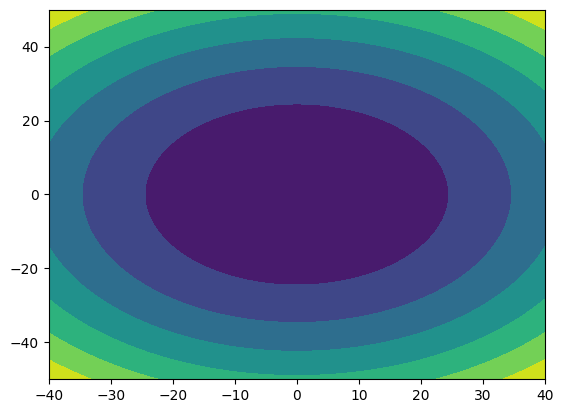

In [16]:
import matplotlib.pyplot as plt

Z = (XX ** 2) + (YY ** 2)
plt.contourf(XX, YY, Z)

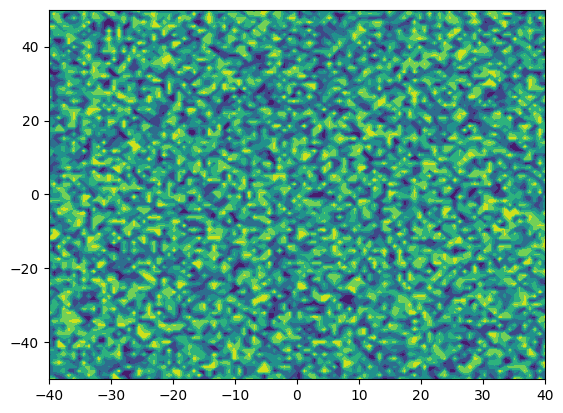

In [17]:
Z = np.random.random((90, 100))
plt.contourf(XX, YY, Z)

### Creating a meshgrid for KNN

In [48]:
# age and salary col
X_train

array([[-1.06675246, -0.38634438],
       [ 0.79753468, -1.22993871],
       [ 0.11069205,  1.853544  ],
       [ 0.60129393, -0.90995465],
       [ 1.87685881, -1.28811763],
       [-0.57615058,  1.44629156],
       [ 0.3069328 , -0.53179168],
       [ 0.99377543,  0.10817643],
       [-1.16487283,  0.45724994],
       [-1.55735433,  0.31180264],
       [ 1.0918958 ,  0.45724994],
       [-0.18366908, -0.47361276],
       [ 0.20881242, -0.32816546],
       [ 0.3069328 ,  0.28271318],
       [-1.16487283, -1.57901222],
       [ 0.11069205,  0.25362372],
       [ 2.07309956,  1.73718616],
       [ 0.40505317, -0.18271817],
       [ 1.4843773 ,  2.11534913],
       [-0.37990983,  1.21357589],
       [ 1.87685881,  1.50447048],
       [ 0.11069205,  0.02090805],
       [ 0.89565505, -1.31720709],
       [-1.36111358, -1.49174384],
       [-0.18366908, -0.5899706 ],
       [-0.57615058,  2.31897535],
       [ 0.99377543, -1.20084925],
       [-0.77239133,  1.06812859],
       [ 2.17121993,

In [52]:
a = np.arange(start=X_train[:, 0].min() - 1, stop=X_train[:, 0].max() + 1, step=0.01)
print(a.shape)
print(a[0])
print(a[-1])

(613,)
-2.949835834910827
3.1701641650890426


In [53]:
b = np.arange(start=X_train[:, 1].min() - 1, stop=X_train[:, 1].max(), step=0.01)
print(b.shape)
print(b[0])
print(b[-1])

(493,)
-2.6081016808964637
2.3118983191034315


In [54]:
XX, YY = np.meshgrid(a, b)
print(XX.shape)
print(XX.shape)

(493, 613)
(493, 613)


In [57]:
XX

array([[-2.94983583, -2.93983583, -2.92983583, ...,  3.15016417,
         3.16016417,  3.17016417],
       [-2.94983583, -2.93983583, -2.92983583, ...,  3.15016417,
         3.16016417,  3.17016417],
       [-2.94983583, -2.93983583, -2.92983583, ...,  3.15016417,
         3.16016417,  3.17016417],
       ...,
       [-2.94983583, -2.93983583, -2.92983583, ...,  3.15016417,
         3.16016417,  3.17016417],
       [-2.94983583, -2.93983583, -2.92983583, ...,  3.15016417,
         3.16016417,  3.17016417],
       [-2.94983583, -2.93983583, -2.92983583, ...,  3.15016417,
         3.16016417,  3.17016417]])

In [58]:
YY

array([[-2.60810168, -2.60810168, -2.60810168, ..., -2.60810168,
        -2.60810168, -2.60810168],
       [-2.59810168, -2.59810168, -2.59810168, ..., -2.59810168,
        -2.59810168, -2.59810168],
       [-2.58810168, -2.58810168, -2.58810168, ..., -2.58810168,
        -2.58810168, -2.58810168],
       ...,
       [ 2.29189832,  2.29189832,  2.29189832, ...,  2.29189832,
         2.29189832,  2.29189832],
       [ 2.30189832,  2.30189832,  2.30189832, ...,  2.30189832,
         2.30189832,  2.30189832],
       [ 2.31189832,  2.31189832,  2.31189832, ...,  2.31189832,
         2.31189832,  2.31189832]])

### Step 3 - Classifying every point on the meshgrid

In [59]:
# age value of the first customer
XX[0][0]

-2.949835834910827

In [60]:
# salary value of the first customer
YY[0][0]

-2.6081016808964637

In [61]:
# This customer will not purchase the product
knn.predict(np.array([XX[0][0], YY[0][0]]).reshape(1, 2))

array([0], dtype=int64)

In [63]:
m = np.array([[1, 2, 3], [4, 5, 6]])
n = np.array([[7, 8, 9], [10, 11, 12]])
print(m)
print(n)

[[1 2 3]
 [4 5 6]]
[[ 7  8  9]
 [10 11 12]]


In [68]:
print(m.shape)
print(n.shape)

(2, 3)
(2, 3)


In [67]:
print(np.array([m.ravel(), n.ravel()]).shape)
np.array([m.ravel(), n.ravel()])

(2, 6)


array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [71]:
np.array([m.ravel(), n.ravel()]).T

array([[ 1,  7],
       [ 2,  8],
       [ 3,  9],
       [ 4, 10],
       [ 5, 11],
       [ 6, 12]])

In [69]:
np.array([XX.ravel(), YY.ravel()]).shape

(2, 302209)

In [72]:
input_array = np.array([XX.ravel(), YY.ravel()]).T
input_array

array([[-2.94983583, -2.60810168],
       [-2.93983583, -2.60810168],
       [-2.92983583, -2.60810168],
       ...,
       [ 3.15016417,  2.31189832],
       [ 3.16016417,  2.31189832],
       [ 3.17016417,  2.31189832]])

In [74]:
y_pred = knn.predict(input_array)
y_pred.shape

(302209,)

In [75]:
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

### Step 4 - Plotting the array as an image

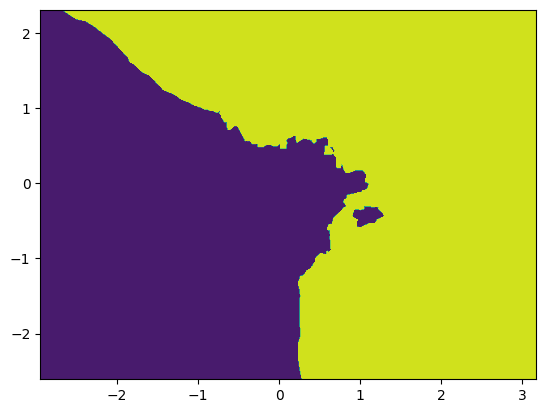

In [76]:
plt.contourf(XX, YY, y_pred.reshape(XX.shape))

### Step 5 - Plotting all the training data on the plot

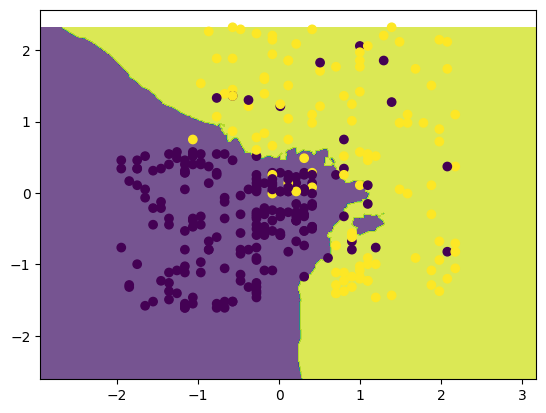

In [83]:
plt.contourf(XX, YY, y_pred.reshape(XX.shape), alpha=0.75)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)